# How Do You Get a Low APR on a Loan? Exploring Borrower's Profile from a Peer-to-Peer Lending Platform
## by Rio Rinaldi

## Investigation Overview

In this investigation, I wanted to get a better understanding of what impacts a borrower's APR. I looked into various aspects of a borrower, such as their income, homeownership status, proposed term for the loan, and a few others. 

## Dataset Overview

The Prosper dataset contains data of borrower profiles as well as their loan application. It contains an exhaustive list of information, ranging from income level, house ownership, employment status, credit limit, as well as information on the loan, such as the term, APR, estimated loss and gain, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

df = df[["Term","BorrowerAPR","ProsperScore","EmploymentStatus","IsBorrowerHomeowner","DebtToIncomeRatio",
   "IncomeRange","Occupation","ListingCreationDate"]]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Debt to Income Ratio & Homeownership's Impact on Borrower's APR

We see a weak relationship that being a homeowner actually slightly increases your APR, given debt to income ratio. However, this is likely because people that have a lot of debt tended to be homeowners. I thus recreated the graph but only looking less than 50% Debt to Income Ratio and found that the relationship weakened. Thus, we don't really see that homeownership combined with debt to income ratio impacts APR much.

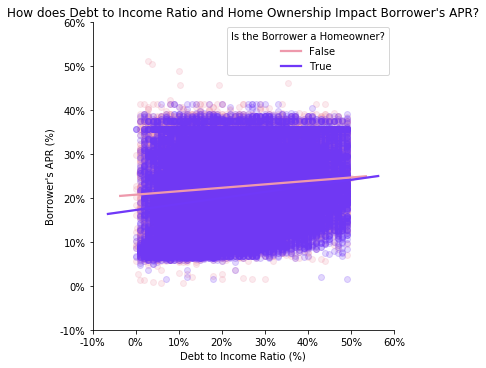

In [4]:
dtir_100200 = df[df["DebtToIncomeRatio"] < 1.5]

# DebtToIncomeRatio vs. BorrowerAPR, Colored by IsBorrrowerHomeowner
# Too overcrowded, let's use resampling to get a smaller amount
dtir_100200_sample = dtir_100200.copy()
dtir_100200_sample = dtir_100200.sample(10000)
dtir_50 = dtir_100200[dtir_100200["DebtToIncomeRatio"] < 0.5]
dtir_50_sample = dtir_50.sample(10000)

# assign manual color
homeowner_color = ['#ee99ac', '#7038f8']

sb.lmplot(data = dtir_50, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws = {'alpha':0.2},
          hue = "IsBorrowerHomeowner", legend = False, palette = homeowner_color);
plt.legend(title='Is the Borrower a Homeowner?', labels=['False','True']);
plt.title("How does Debt to Income Ratio and Home Ownership Impact Borrower's APR?");

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

ticks_pct = []
locs_x = plt.xticks()[0]

for i in plt.xticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2]
    pct = str(pct) + "%"
    ticks_pct.append(pct)
    
plt.xticks(locs_x, ticks_pct);
plt.ylabel("Borrower's APR (%)");
plt.xlabel("Debt to Income Ratio (%)");

## Employment Status and Loan Term Length's Impact on Borrower's APR

For employment status and loan term length, it looks like if you are not high risk, then a shorter term length means lower APR (being employed and full-time). However, if you are high risk, a short term loan gives higher APR. This makes sense, given that you become much higher risk for lenders. 

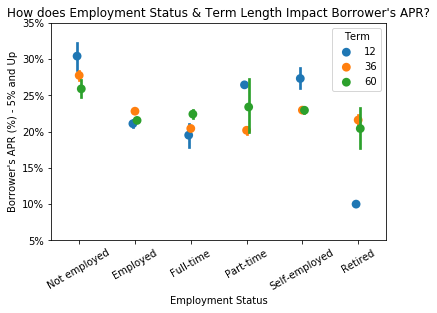

In [6]:
employment_order = ["Not employed","Employed","Full-time","Part-time","Self-employed","Retired"]

# EmploymentStatus vs. BorrowerAPR, Colored by Term
ax = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term', lodge=0.4, 
                  order = employment_order, dodge = True, linestyles='');
plt.xticks(rotation = 30);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

plt.title("How does Employment Status & Term Length Impact Borrower's APR?");
plt.ylabel("Borrower's APR (%) - 5% and Up");
plt.xlabel("Employment Status");

## Income & Homeownership's Impact on Borrower APR

For income and homeownership, we saw a clear relationship. We found that having a home is a valuable asset and on average, does reduce your APR. This applies for all income levels except if you are unemployed, in which maybe having a home can be seen as risk because you have to continue paying mortgage payments or risk losing the house. 

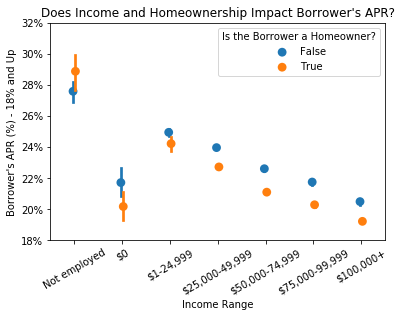

In [8]:
income_order = ["Not employed","$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]

# IncomeRange vs. BorrowerAPR, Colored by Homeowner
ax = sb.pointplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', lodge=0.4, 
                  order = income_order, dodge = True, linestyles='');
plt.legend(title='Is the Borrower a Homeowner?');
plt.xticks(rotation = 30);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

plt.title("Does Income and Homeownership Impact Borrower's APR?");
plt.xlabel("Income Range");
plt.ylabel("Borrower's APR (%) - 18% and Up");